### Exploratory Data Analysis and Prediction of CO2 emission 

In this note i've considered the data set consisting of car attributes such as mileage, engine size, clinders etc and performed basic data analysis, cleaning and visualization to gain insight about the data.

Python libraries such as Pandas for data manipulation and analysis, Numpy for high-level mathematical functions to operate on arrays, Matplotlib for creating static, animated, and interactive visualizations, and Seaborn for drawing attractive and informative statistical graphics,and Sklearn for machine learning and statistical modeling including classification, regression, clustering, and dimensionality reduction are used in this notebook to perform the necessary functions.

Regression analysis is done for one of two purposes: To predict the value of the dependent variable for individuals for whom some information concerning the explanatory variables is available, or to estimate the effect of some explanatory variable on the dependent variable.

#### Lets import the necessary libraries and data into the notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

matplotlib.rcParams['font.size']=17
matplotlib.rcParams['figure.figsize']=(11.7,8.27)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df = pd.read_csv('../input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv')

In [3]:
df_description = pd.read_csv('../input/co2-emission-by-vehicles/Data Description.csv')

In [4]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [5]:
df_description

,Understanding the Data,Unnamed: 1
0,Model,4WD/4X4 = Four-wheel drive
1,NaN,AWD = All-wheel drive
2,NaN,FFV = Flexible-fuel vehicle
3,NaN,SWB = Short wheelbase
4,NaN,LWB = Long wheelbase
5,NaN,EWB = Extended wheelbase
6,Transmission,A = automatic
7,NaN,AM = automated manual
8,NaN,AS = automatic with select shift
9,NaN,AV = continuously variable


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
df.drop_duplicates(inplace = True)

#### after removing the duplicates which were more than 1000 obersavations we can start perfroming analysis.

In [8]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
fuel_df = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()

In [10]:
fuel_df.index= ['diesel','ethanol (E85)','natural gas','regular gasoline','premium gasoline']

In [11]:
cars_df = df.groupby('Make')['CO2 Emissions(g/km)'].mean()
cars_df.sort_values(ascending= True, inplace=True)

In [12]:
car_type_df = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()
car_type_df.sort_values(ascending= True, inplace=True)

In [13]:
car_trans_df = df.groupby('Transmission')['CO2 Emissions(g/km)'].mean()
car_trans_df.sort_values(ascending= True, inplace=True)

#### Since we have a lot of transmission type and they effect the CO2 emission we'll bin them into three catagories and create their dummies for regression model

In [14]:
low_trans_emission = car_trans_df[car_trans_df <220]
high_trans_emission = car_trans_df[car_trans_df >260]

In [15]:
buffer = car_trans_df[car_trans_df > 220]
mid_trans_emission=buffer[buffer <260]

In [16]:
low_trans_emission

Transmission
AM5     148.500000
AV      173.481328
AV10    181.444444
AM6     189.280374
AV6     190.752809
AV7     192.260870
M5      195.178571
AV8     216.735294
Name: CO2 Emissions(g/km), dtype: float64

In [17]:
mid_trans_emission

Transmission
AS4    226.500000
M6     232.157827
AS6    240.277436
AS9    245.815385
A9     247.368821
AM8    255.622222
Name: CO2 Emissions(g/km), dtype: float64

In [18]:
high_trans_emission

Transmission
AM9     261.000000
M7      262.025641
AS8     262.435606
AM7     269.856397
AS5     275.115385
AS7     278.431095
A6      278.798246
AS10    283.125828
A8      285.415344
A4      296.590164
A5      299.371795
A10     313.964286
A7      314.272727
Name: CO2 Emissions(g/km), dtype: float64

In [19]:
dummy = df

In [20]:
dummy['Transmission'] = dummy['Transmission'].where(~(dummy['Transmission'].str.contains('AM5|AM5|AV|AV10|AM6|AV6|AV7|M5|AV8',na=False)),'Low')

In [21]:
dummy['Transmission'] = dummy['Transmission'].where(~(dummy['Transmission'].str.contains('AS4|M6|AS6|AS9|A9|AM8',na=False)),'mid')

In [22]:
dummy['Transmission'] = dummy['Transmission'].where(~(dummy['Transmission'].str.contains('AM9|M7|AS8|AM7|AS5|AS7|A6|AS10|A8|A4|A5|A10|A7',na=False)),'high')

In [23]:
dummy['Transmission'].unique()

array(['high', 'mid', 'Low'], dtype=object)

In [24]:
dummy_trans = dummy.groupby('Transmission')['CO2 Emissions(g/km)'].mean()
dummy_trans.sort_values(ascending= True, inplace=True)

In [25]:
dummy_trans

Transmission
Low     186.979839
mid     238.795802
high    274.541372
Name: CO2 Emissions(g/km), dtype: float64

In [26]:
cars_count = df.Make.value_counts()

In [27]:
fuel_df

diesel              235.238095
ethanol (E85)       276.048485
natural gas         213.000000
regular gasoline    235.977953
premium gasoline    265.731284
Name: CO2 Emissions(g/km), dtype: float64

### Data Visualization

In [28]:
sns.set(style="darkgrid", color_codes=True)

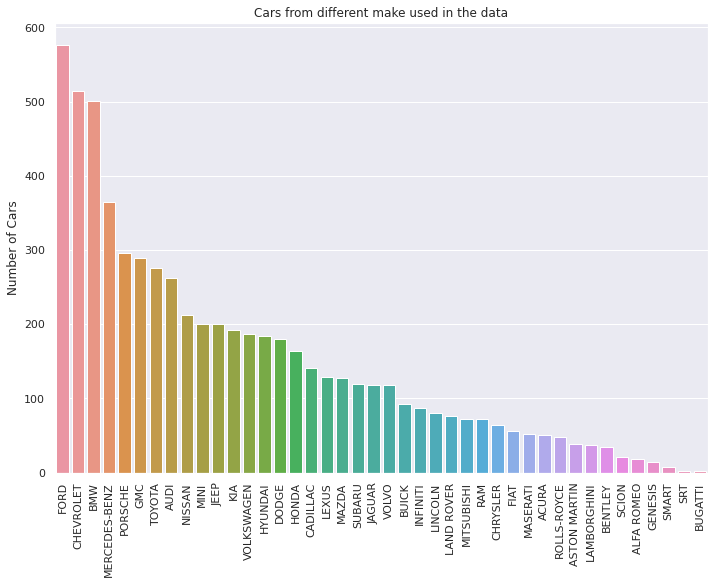

In [29]:
sns.barplot(x=cars_count.index, y=cars_count);
plt.xticks(rotation = 90);
plt.ylabel("Number of Cars")
plt.title("Cars from different make used in the data");

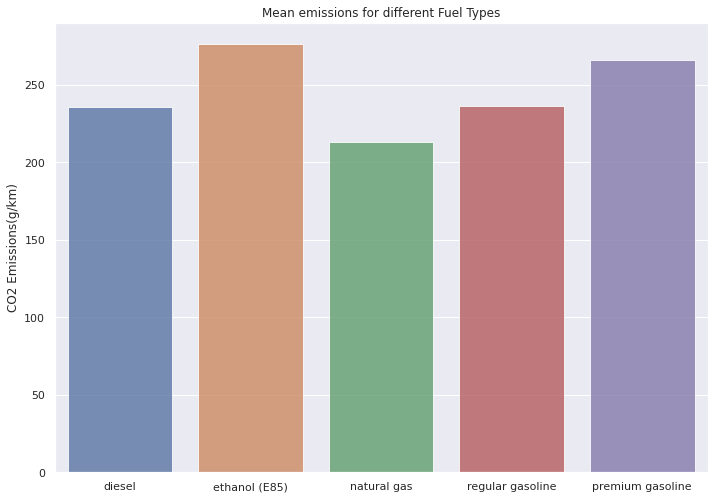

In [30]:
sns.barplot(x=fuel_df.index, y=fuel_df , alpha=0.8)
plt.title("Mean emissions for different Fuel Types");

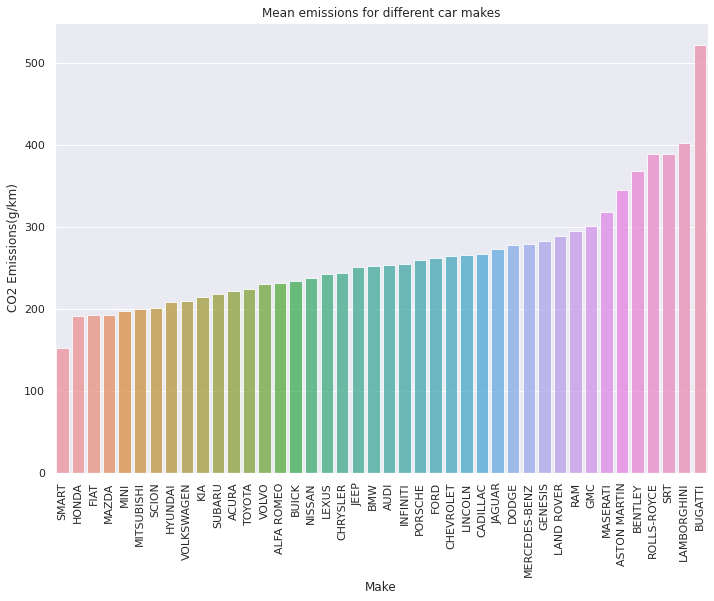

In [31]:
sns.barplot(x=cars_df.index, y=cars_df , alpha=0.8)
plt.title("Mean emissions for different car makes");
plt.xticks(rotation = 90);

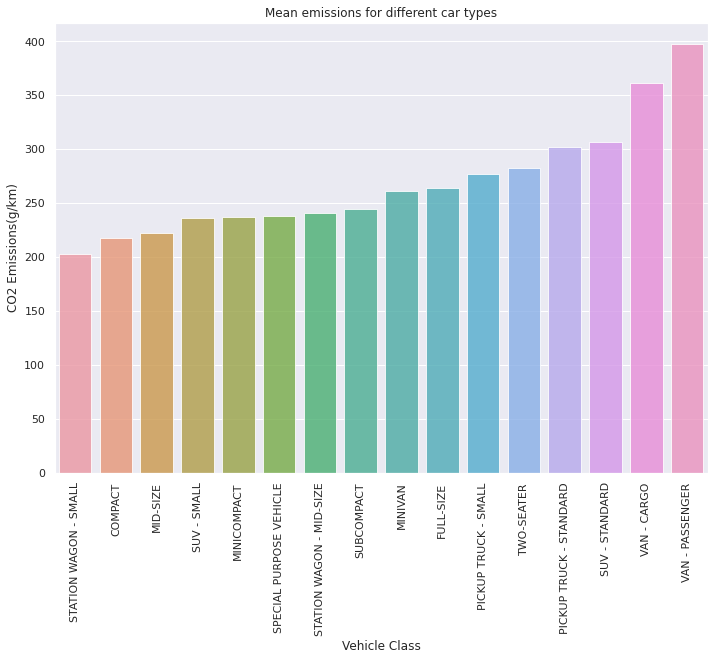

In [32]:
sns.barplot(x=car_type_df.index, y=car_type_df , alpha=0.8)
plt.title("Mean emissions for different car types");
plt.xticks(rotation = 90);

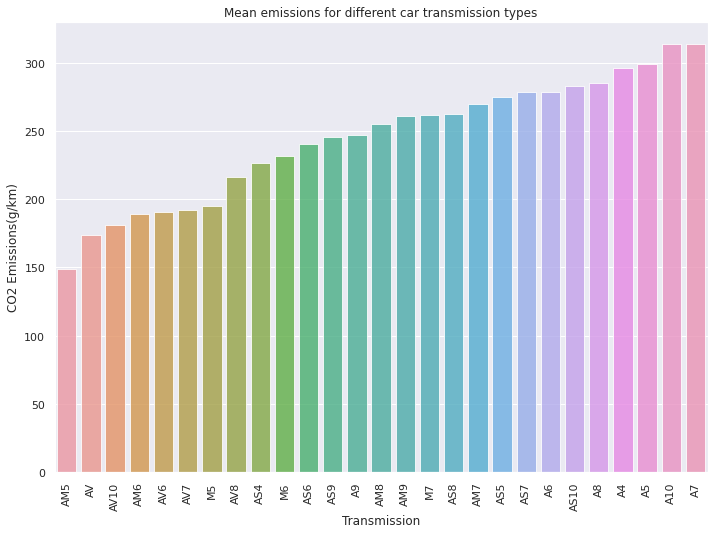

In [33]:
sns.barplot(x=car_trans_df.index, y=car_trans_df , alpha=0.8)
plt.title("Mean emissions for different car transmission types");
plt.xticks(rotation = 90);

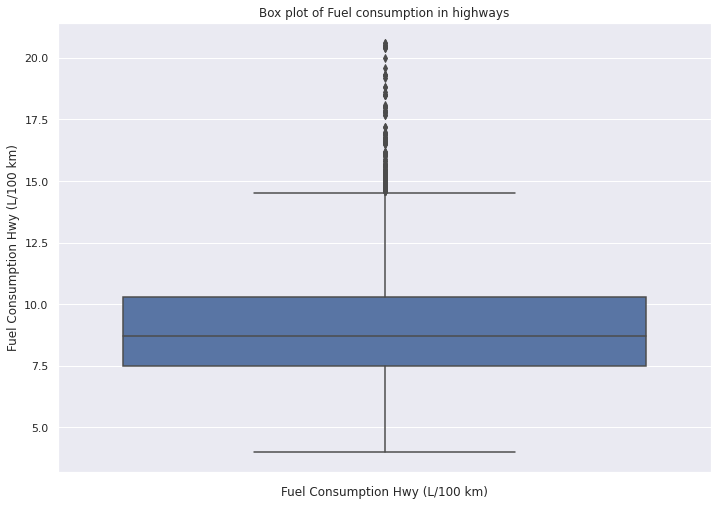

In [34]:
sns.boxplot(y=df['Fuel Consumption Hwy (L/100 km)']);
plt.xlabel('Fuel Consumption Hwy (L/100 km)')
plt.title('Box plot of Fuel consumption in highways');

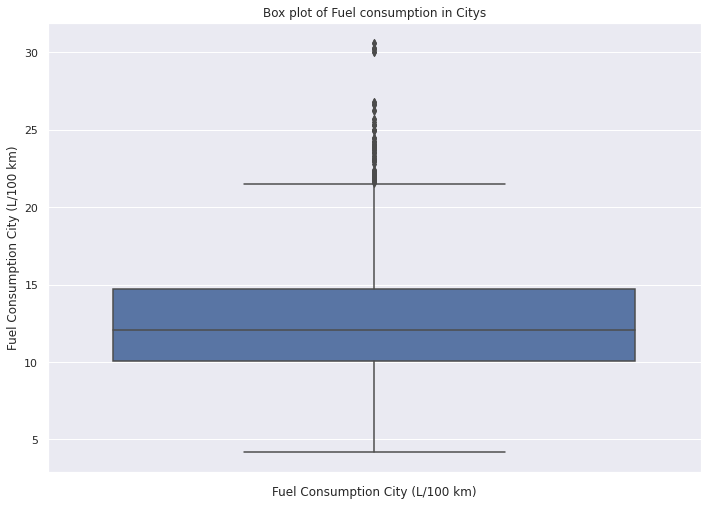

In [35]:
sns.boxplot(y=df['Fuel Consumption City (L/100 km)']);
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.title('Box plot of Fuel consumption in Citys');

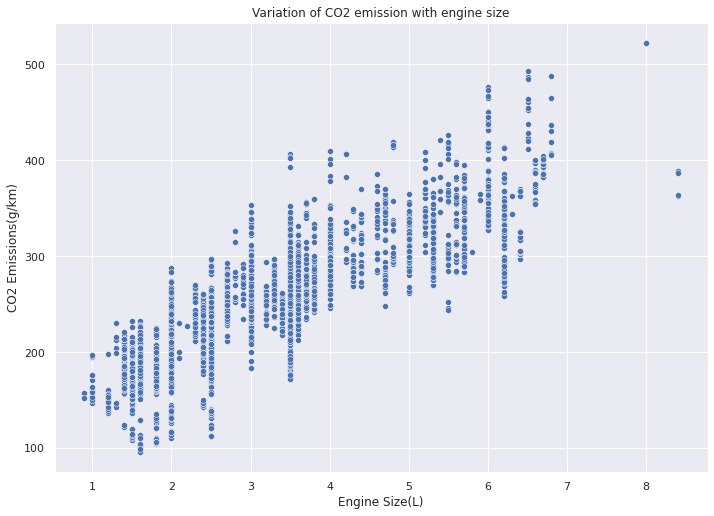

In [36]:
sns.scatterplot(x=df['Engine Size(L)'], y= df['CO2 Emissions(g/km)']);
plt.title('Variation of CO2 emission with engine size');

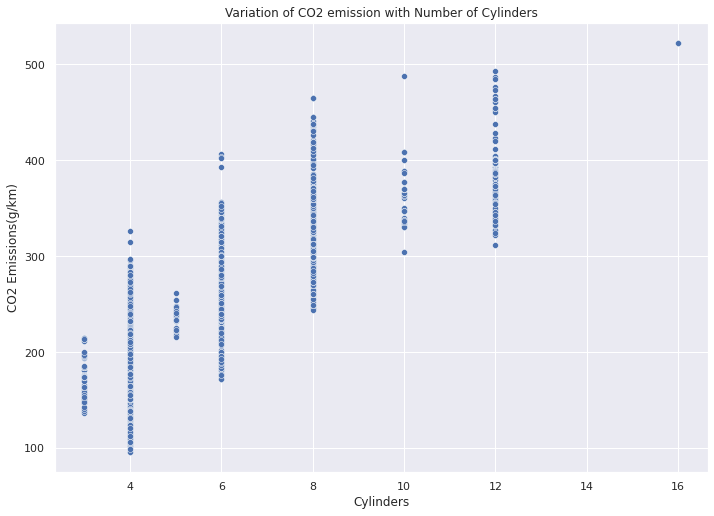

In [37]:
sns.scatterplot(x=df['Cylinders'], y= df['CO2 Emissions(g/km)']);
plt.title('Variation of CO2 emission with Number of Cylinders');

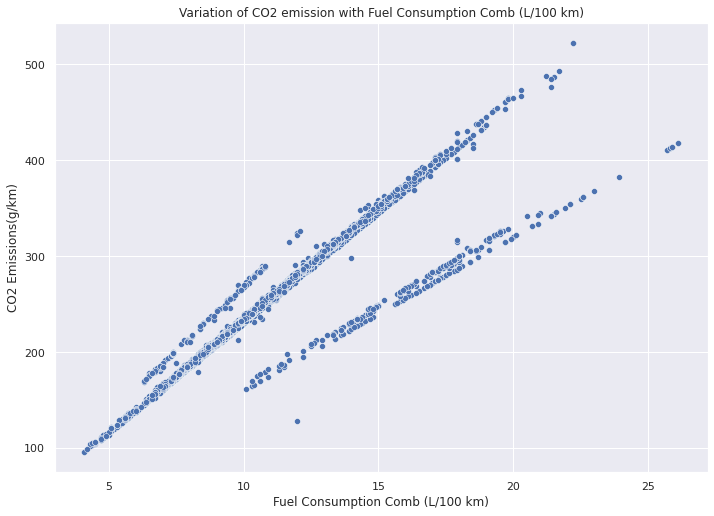

In [38]:
sns.scatterplot(x=df['Fuel Consumption Comb (L/100 km)'], y= df['CO2 Emissions(g/km)']);
plt.title('Variation of CO2 emission with Fuel Consumption Comb (L/100 km)');

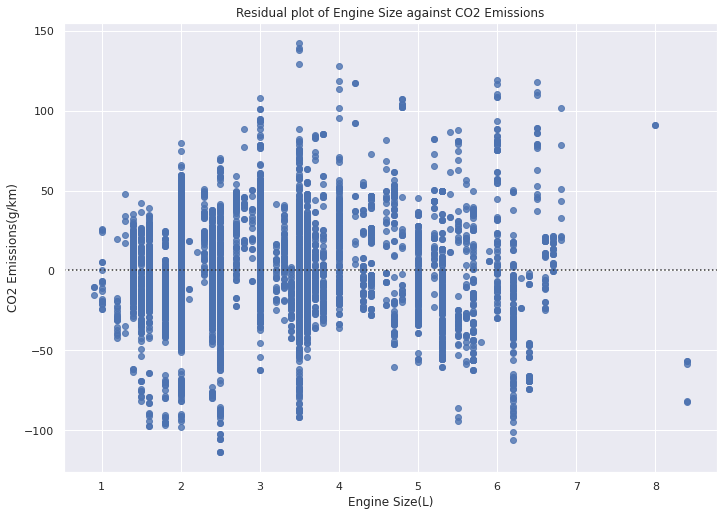

In [39]:
sns.residplot(x=df['Engine Size(L)'], y= df['CO2 Emissions(g/km)']);
plt.title('Residual plot of Engine Size against CO2 Emissions');

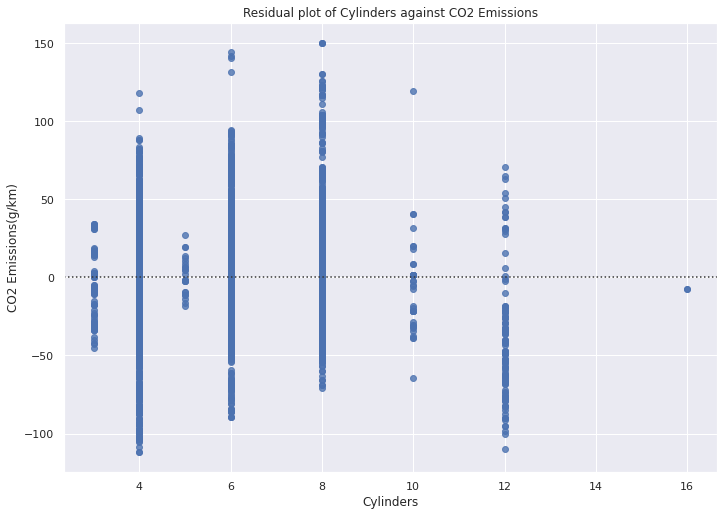

In [40]:
sns.residplot(x=df['Cylinders'], y= df['CO2 Emissions(g/km)']);
plt.title('Residual plot of Cylinders against CO2 Emissions');

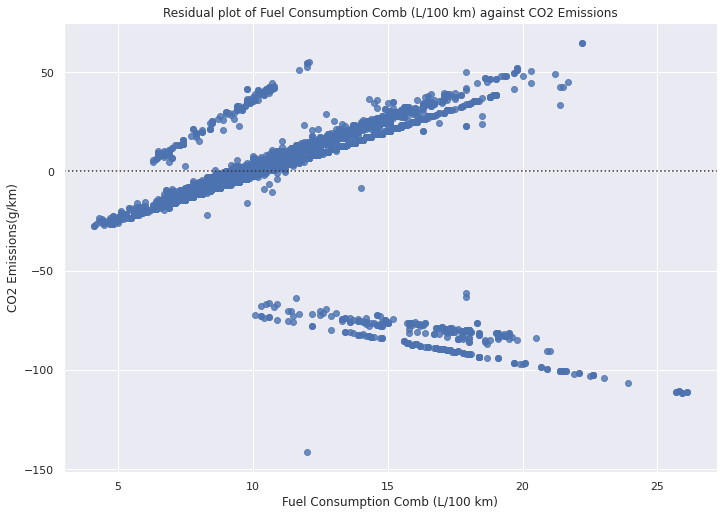

In [41]:
sns.residplot(x=df['Fuel Consumption Comb (L/100 km)'], y= df['CO2 Emissions(g/km)']);
plt.title('Residual plot of Fuel Consumption Comb (L/100 km) against CO2 Emissions');

In [42]:
categorical_data = df[['Transmission']]

In [43]:
cars_dummies = pd.get_dummies(categorical_data, drop_first = True)

In [44]:
df = df.drop(list(categorical_data.columns), axis=1)
df = pd.concat([df, cars_dummies], axis=1)

In [45]:
cars_dummies

,Transmission_high,Transmission_mid
0,1,0
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
7380,1,0
7381,1,0
7382,1,0
7383,1,0


In [46]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_high,Transmission_mid
0,ACURA,ILX,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,196,1,0
1,ACURA,ILX,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,221,0,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Z,6.0,5.8,5.9,48,136,0,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Z,12.7,9.1,11.1,25,255,0,1
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Z,12.1,8.7,10.6,27,244,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Z,10.7,7.7,9.4,30,219,1,0
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Z,11.2,8.3,9.9,29,232,1,0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Z,11.7,8.6,10.3,27,240,1,0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Z,11.2,8.3,9.9,29,232,1,0


<AxesSubplot:>

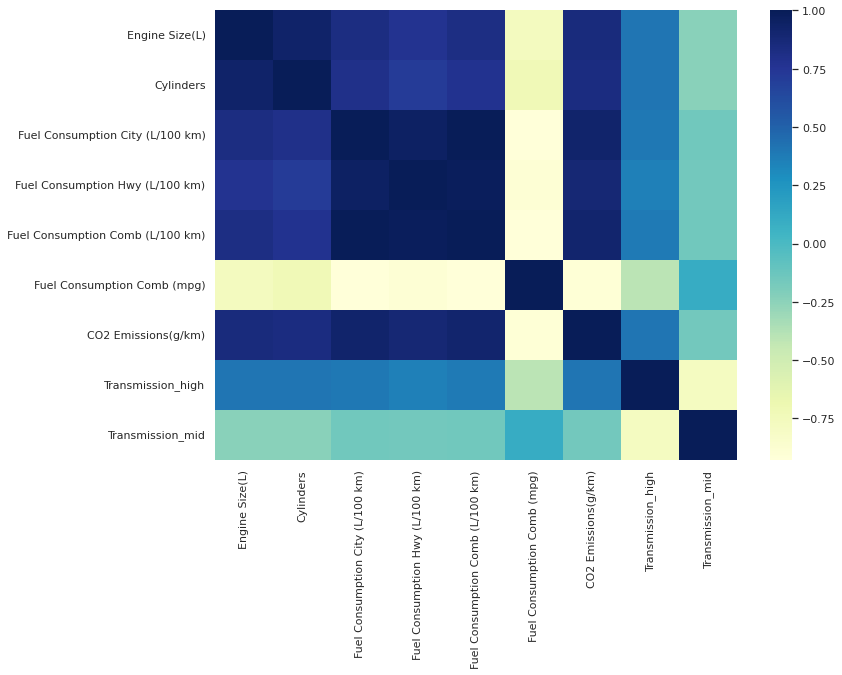

In [47]:
sns.heatmap(df.corr(), cmap= 'YlGnBu')

### Correlation between features and CO2 emission

In [48]:
df.corr()['CO2 Emissions(g/km)']

Engine Size(L)                      0.854802
Cylinders                           0.834687
Fuel Consumption City (L/100 km)    0.918756
Fuel Consumption Hwy (L/100 km)     0.883424
Fuel Consumption Comb (L/100 km)    0.916840
Fuel Consumption Comb (mpg)        -0.906783
CO2 Emissions(g/km)                 1.000000
Transmission_high                   0.408486
Transmission_mid                   -0.157765
Name: CO2 Emissions(g/km), dtype: float64

### Regression Models

first i tried multi-linear model to check the fit of the curve but after seeing the results i opted to do polynomial regression as well to get better results

#### Linear Regression

In [49]:
linear_reg = LinearRegression()

In [50]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)',
       'Transmission_high', 'Transmission_mid'],
      dtype='object')

In [51]:
x = df[['Engine Size(L)', 'Cylinders','Fuel Consumption Comb (L/100 km)','Transmission_high', 'Transmission_mid']]
y = df['CO2 Emissions(g/km)']

In [52]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [53]:
linear_reg.fit(x_train, y_train)

LinearRegression()

In [54]:
y_predicted = linear_reg.predict(x_test) 

### Residual Mean Square Error

In [55]:
np.mean((y_predicted - y_test)**2)

434.30321165927245

#### R2 Score

In [56]:
linear_reg.score(x_test, y_test)

0.877441090627165

In [57]:
r2_score(y_test,y_predicted)

0.877441090627165

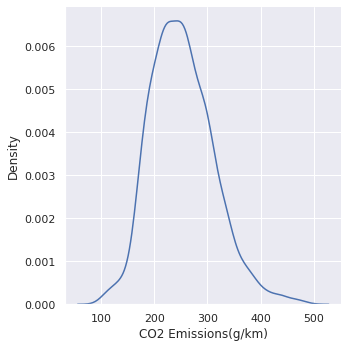

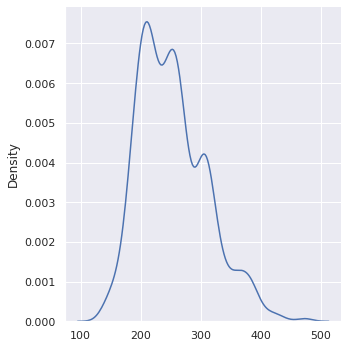

In [58]:
sns.displot(y_test , kind='kde')
sns.displot(y_predicted, kind='kde');

### Polynomial Regression

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
ply = PolynomialFeatures(degree = 2, include_bias = False)

In [61]:
x_train_poly = ply.fit_transform(x_train)

In [62]:
poly_reg = LinearRegression()

In [63]:
poly_reg.fit(x_train_poly, y_train)

LinearRegression()

In [64]:
x_test_poly = ply.transform(x_test)

In [65]:
y_poly_predicted = poly_reg.predict(x_test_poly)

### Residual Mean Square Error

In [66]:
np.mean((y_poly_predicted-y_test)**2)

319.9780281442178

### R2 Score

In [67]:
poly_reg.score(x_test_poly,y_test)

0.9097032738883077

In [68]:
r2_score(y_test, y_poly_predicted)

0.9097032738883077

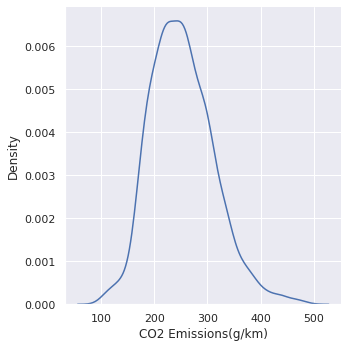

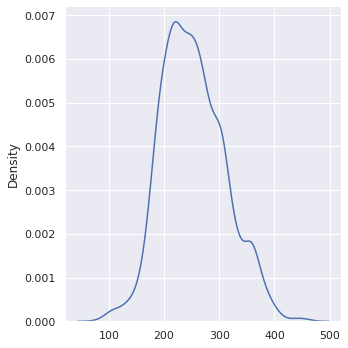

In [69]:
sns.displot(y_test, kind='kde')
sns.displot(y_poly_predicted, kind='kde');

### Conclusion

From the above visualizations we can better understand the data and how they impact the CO2 emission of cars.
I have also created a model that can predict the CO2 emission of cars with a r2_score of 0.91.